# Constructing HEP vectors and analyzing HEP data using Vector

**Henry Schreiner\*, Jim Pivarski\*, and Saransh Chopra<sup>+</sup> (speaker)**

\*: Princeton University <sup>+</sup>: Cluster Innovation Centre, University of Delhi

**Quick links**:
- GitHub repository (of vector) - https://github.com/scikit-hep/vector
- Vector's documentation - https://vector.readthedocs.io/
- GitHub repository (of this talk) - https://github.com/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector
- Binder (to run the code with us) - https://mybinder.org/v2/gh/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector/HEAD?urlpath=lab/tree/talk.ipynb


Some parts of this notebook are inspired by [vector's documentation](https://vector.readthedocs.io/en/latest/), [vector's README](https://github.com/scikit-hep/vector#readme), [Lorentz vectors, particle PDG, jet-clustering, oh my!
 \- Scikit-HEP tutorial](https://hsf-training.github.io/hsf-training-scikit-hep-webpage/06-lorentz-vectors/index.html), and [Data handling: uproot, awkward & vector by Mason Proffitt](https://indico.cern.ch/event/1076231/contributions/4560398/).

## Table of contents

1. [Introduction](#Introduction)
2. [Goals](#Goals)
3. [Setup](#Setup)
4. [Pure Python Object vectors](#Pure-Python-Object-vectors)
5. [NumPy vectors](#NumPy-vectors)
6. [Awkward vectors](#Awkward-vectors)
7. [Compiling vectors with Numba](#Compiling-vectors-with-Numba)
8. [Uproot, Awkward, and Vector](#Uproot,-Awkward,-and-Vector)
9. [Recent developments](#Recent-developments)
10. [Near future development plans](#Near-future-development-plans)
11. [Stuck somewhere? Reach out!](#Stuck-somewhere?-Reach-out!)
12. [Cite vector](#Cite-vector)

## Introduction

Vector is a Python library for 2D, 3D, and Lorentz vectors, including arrays of vectors, designed to solve common physics problems in a NumPy-like way. Vector currently supports pure Python Object, NumPy, Awkward, and Numba-based (Numba-Object, Numba-Awkward) backends.

Main features of Vector:

- Pure Python with NumPy as its only dependency. This makes it easier to install.
- Vectors may be represented in a variety of coordinate systems: Cartesian, cylindrical, pseudorapidity, and any combination of these with time or proper time for Lorentz vectors. In all, there are 12 coordinate systems: {_x_-_y_ vs _ρ_-_φ_ in the azimuthal plane} × {_z_ vs _θ_ vs _η_ longitudinally} × {_t_ vs _τ_ temporally}.
- Uses names and conventions set by [ROOT](https://root.cern/)'s [TLorentzVector](https://root.cern.ch/doc/master/classTLorentzVector.html) and [Math::LorentzVector](https://root.cern.ch/doc/master/classROOT_1_1Math_1_1LorentzVector.html), as well as [scikit-hep/math](https://github.com/scikit-hep/scikit-hep/tree/master/skhep/math), [uproot-methods TLorentzVector](https://github.com/scikit-hep/uproot3-methods/blob/master/uproot3_methods/classes/TLorentzVector.py), [henryiii/hepvector](https://github.com/henryiii/hepvector), and [coffea.nanoevents.methods.vector](https://coffeateam.github.io/coffea/modules/coffea.nanoevents.methods.vector.html).
- Implemented on a variety of backends:
  - pure Python objects
  - NumPy arrays of vectors (as a [structured array](https://numpy.org/doc/stable/user/basics.rec.html) subclass)
  - [Awkward Arrays](https://awkward-array.org/) of vectors
  - potential for more: CuPy, TensorFlow, Torch, JAX...
- NumPy/Awkward backends also implemented in [Numba](https://numba.pydata.org/) for JIT-compiled calculations on vectors.
- Distinction between geometrical vectors, which have a minimum of attribute and method names, and vectors representing momentum, which have synonyms like `pt` = `rho`, `energy` = `t`, `mass` = `tau`.

## Goals

This talk will focus on introducing Vector and its backends through a data analysis pipeline. The session will build up from pure Python Object based vectors to Awkward based vectors, ending with a demonstration of Numba support. Furthermore, we will discuss the latest developments in the library's API and showcase some recent enhancements.

## Setup

There are two ways to follow along (or run this notebook after the talk) -

1. Locally

    - Clone [this](https://github.com/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector.git) repository -
```bash
git clone https://github.com/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector.git
```

    - Change directory
```bash
cd Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector
```

    - Launch the classic Jupyter notebook or Jupyter lab -
```bash
jupyter notebook
# or
jupyter lab
```

2. On cloud (recommended)

    - Binder (recommended)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector/HEAD?urlpath=lab/tree/talk.ipynb)

    - Google Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector/blob/main/talk.ipynb)

We will be directly importing `vector`, `awkward`, `numpy`, `numba`, and `uproot` in this tutorial. Hence, a user must install these packages if this notebook is being run locally or on Google Colab.

In [1]:
# Python 3.6 -
# !pip install vector==0.9.0 awkward==1.9.0 uproot==4.5.3 numba

# Python 3.7+ -
# !pip install vector==0.10.0 awkward==1.10.0 uproot==4.5.3 numba

import vector

## Pure Python Object vectors

### Generic vectors

One can create `Object` type vectors using the `obj` constructor or using the -

- VectorObject2D.from_xy()
- VectorObject2D.from_rhophi()
- VectorObject3D.from_xyz()
- VectorObject3D.from_xytheta()
- VectorObject3D.from_xyeta()
- VectorObject3D.from_rhophiz()
- ...
- VectorObject4D.from_xyzt()
- VectorObject4D.from_xythetat()
- ...

class methods.

In [2]:
v1 = vector.obj(x=1, y=2)
v2 = vector.obj(x=1, y=2, z=3)

v1, v2

(vector.obj(x=1, y=2), vector.obj(x=1, y=2, z=3))

In [3]:
v1 = vector.VectorObject2D.from_xy(1, 2)
v2 = vector.VectorObject4D.from_xythetat(1, 2, 3, 4)

v1, v2

(vector.obj(x=1, y=2), vector.obj(x=1, y=2, theta=3, t=4))

### Momentum vectors

The `obj` constructor has momentum overloads, which allow users to create momentum vectors using the same syntax!

In [4]:
vm1 = vector.obj(px=1, py=2)
vm2 = vector.obj(px=1, py=2, pz=3, m=4)

vm1, vm2

(vector.obj(px=1, py=2), vector.obj(px=1, py=2, pz=3, mass=4))

### Inheritance and super classes

In [5]:
vec2D = vector.obj(x=1., y=2.)
vec3D = vector.obj(x=1., y=2., z=3.)
vec4D = vector.obj(x=1., y=2., z=3. , tau=4.)

type(vec2D), type(vec3D), type(vec4D)

(vector.backends.object.VectorObject2D,
 vector.backends.object.VectorObject3D,
 vector.backends.object.VectorObject4D)

All vector classes are the subclass of `Vector`

In [6]:
isinstance(vec2D, vector.Vector), isinstance(vec3D, vector.Vector), isinstance(vec4D, vector.Vector)

(True, True, True)

All `2D` vector classes are a subclass of `Vector2D`, and so on ...

In [7]:
isinstance(vec2D, vector.Vector2D), isinstance(vec3D, vector.Vector3D), isinstance(vec4D, vector.Vector4D)

(True, True, True)

Every backend has its own `Vector<Backend><X>D` classes, which is a subclass of `Vector<Backend>`.

In [8]:
isinstance(vec2D, vector.VectorObject), isinstance(vec3D, vector.VectorObject), isinstance(vec4D, vector.VectorObject)

(True, True, True)

In [9]:
isinstance(vec2D, vector.VectorObject2D), isinstance(vec3D, vector.VectorObject3D), isinstance(vec4D, vector.VectorObject4D)

(True, True, True)

Summarising (can replace `Object` with another backend) -

In [10]:
isinstance(vec2D, (vector.Vector, vector.Vector2D, vector.VectorObject, vector.VectorObject2D))

True

Additionally, vector classes are also a subclass of `Planar`, `Spatial`, and/or `Temporal`.

In [11]:
isinstance(vec3D, vector.Planar), isinstance(vec2D, vector.Spatial), isinstance(vec4D, vector.Lorentz)

(True, False, True)

Similarly for `MomentumVectors` -

In [12]:
vecm = vector.obj(px=1., py=2., pz=3., E=4.)
isinstance(
    vecm, 
    (
        vector.Momentum,
        vector.MomentumObject2D,
        vector.Vector,
        vector.Vector2D,
        vector.VectorObject2D,
        vector.Planar,
        vector.Spatial,
        vector.Temporal,
    )
)

True

And `Azimuthal`, `Longitudinal`, `Temporal` classes -

In [13]:
vec4D = vector.obj(x=1., y=2., z=3., tau=4.)

assert isinstance(
    vec4D.azimuthal,
    (
        vector.Azimuthal,
        vector.AzimuthalXY,
        vector.backends.object.AzimuthalObject,
        vector.backends.object.AzimuthalObjectXY,
    )
)

assert isinstance(
    vec4D.longitudinal,
    (
        vector.Longitudinal,
        vector.LongitudinalZ,
        vector.backends.object.LongitudinalObject,
        vector.backends.object.LongitudinalObjectZ,
    )
)

assert isinstance(
    vec4D.temporal,
    (
        vector.Temporal,
        vector.TemporalTau,
        vector.backends.object.TemporalObject,
        vector.backends.object.TemporalObjectTau,
    )
)

The complete inheritance flow (similar for other backends) -

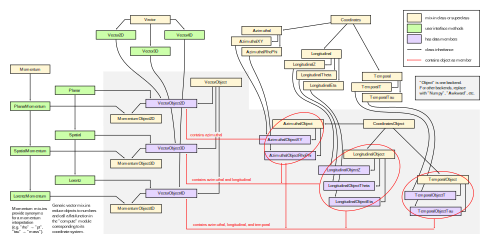

In [14]:
from IPython.display import SVG, display

display(SVG("./inheritance.svg"))

# better here - https://github.com/scikit-hep/vector/blob/main/docs/api/inheritance.svg

### Methods and properties

`Vector` comes loaded with numerous methods and properties which are flowed down using inheritance or are directly defined in the child class.

- `x`, `y`, `z`, `t`, `rho`, `phi`, ...

- `add`, `subtract`, `cross`, `dot`, `equal`, ...

- `to_xyz`, `to_xyzt`, `to_rhophithetatau`, ..., `to_Vector2D` `to_Vector3D`, ...

- `azimuthal`, `longitudinal`, `temporal`

- `costheta`, `cottheta`

- `deltaangle`, `deltaphi`, `deltaeta`, `deltaR`, `deltaR2`

-  ...

A great way to go through these methods and properties is to press TAB!

An even greater way is to go through the documentation!

A complete list of vector properties and methods is available here - https://github.com/scikit-hep/vector#vector-properties 

In [15]:
vec3D = vector.obj(x=1., y=3., z=3.)

In [ ]:
vec3D.

Let's say we want to gather the azimuthal coordinates. We will start by obtaining the `Azimuthal` object -

In [16]:
vec3D.azimuthal

AzimuthalObjectXY(x=1.0, y=3.0)

Next, let's quickly go through the docs of `AzimuthalObjectXY.

In [17]:
?vector.backends.object.AzimuthalObjectXY

Now we know that we can use the `elements` property to access the coordinates!

In [18]:
vec3D.azimuthal.elements

(1.0, 3.0)

The combination of coordinates that vector supports -

The allowed keyword arguments for 2D vectors are:

- `x` and `y` for Cartesian azimuthal coordinates,
- `px` and `py` for momentum,
- `rho` and `phi` for polar azimuthal coordinates,
- `pt` and `phi` for momentum.

For 3D vectors, you need the above and:

- `z` for the Cartesian longitudinal coordinate,
- `pz` for momentum,
- `theta` for the spherical polar angle (from $0$ to $\pi$, inclusive),
- `eta` for pseudorapidity, which is a kind of spherical polar angle.

For 4D vectors, you need the above and:

- `t` for the Cartesian temporal coordinate,
- `E` or `energy` to get four-momentum,
- `tau` for the "proper time" (temporal coordinate in the vector's rest coordinate system),
- `M` or `mass` to get four-momentum.

All possible combinations (replace with momentum coordinates for momentum vectors)

- (2D) `x` `y`
- (2D) `rho` `phi`
- (3D) `x` `y` `z`
- (3D) `x` `y` `theta`
- (3D) `x` `y` `eta`
- (3D) `rho` `phi` `z`
- (3D) `rho` `phi` `theta`
- (3D) `rho` `phi` `eta`
- (4D) `x` `y` `z` `t`
- (4D) `x` `y` `z` `tau`
- (4D) `x` `y` `theta` `t`
- (4D) `x` `y` `theta` `tau`
- (4D) `x` `y` `eta` `t`
- (4D) `x` `y` `eta` `tau`
- (4D) `rho` `phi` `z` `t`
- (4D) `rho` `phi` `z` `tau`
- (4D) `rho` `phi` `theta` `t`
- (4D) `rho` `phi` `theta` `tau`
- (4D) `rho` `phi` `eta` `t`
- (4D) `rho` `phi` `eta` `tau`

## NumPy vectors

`Vector` provides `vector.VectorNumpyXD` classes and `vector.array`constructor to construct `NumPy` vectors. The `VectorNumpyXD` classes are subclasses of `NumPy` array; hence they behave a lot like a structured `NumPy` array.

Currently, vector only accepts structured `NumPy` arrays to construct vectors. The `NumPy` dtype of a structured array is `object`; hence, these arrays are not as fast as the conventional `NumPy` arrays. 

In [19]:
vector.array(
    [(1., 2.), (3., 4.), (5., 6.), (7., 8.), (9., 10.)],
    dtype=[("x", float), ("y", float)],
)

VectorNumpy2D([(1.,  2.), (3.,  4.), (5.,  6.), (7.,  8.), (9., 10.)],
              dtype=[('x', '<f8'), ('y', '<f8')])

In [20]:
vector.VectorNumpy2D(
    [(1.1, 2.1), (1.2, 2.2), (1.3, 2.3), (1.4, 2.4), (1.5, 2.5)],
    dtype=[("rho", float), ("phi", float)],
)

VectorNumpy2D([(1.1, 2.1), (1.2, 2.2), (1.3, 2.3), (1.4, 2.4), (1.5, 2.5)],
              dtype=[('rho', '<f8'), ('phi', '<f8')])

One can also pass `pandas` like columns to the `vector.array` constructors.

In [21]:
vector.array({"x": [1.1, 1.2, 1.3, 1.4, 1.5], "y": [2.1, 2.2, 2.3, 2.4, 2.5]})

VectorNumpy2D([(1.1, 2.1), (1.2, 2.2), (1.3, 2.3), (1.4, 2.4), (1.5, 2.5)],
              dtype=[('x', '<f8'), ('y', '<f8')])

Existing NumPy arrays can be viewed as arrays of vectors, but it needs to be a structured array with recognized field names.

In [22]:
import numpy as np

vec = np.arange(0, 24, 0.1).view(
    [
        ("x", float),
        ("y", float),
        ("z", float),
        ("t", float),
    ]
).view(
    vector.VectorNumpy4D
)

vec

VectorNumpy4D([( 0. ,  0.1,  0.2,  0.3), ( 0.4,  0.5,  0.6,  0.7),
               ( 0.8,  0.9,  1. ,  1.1), ( 1.2,  1.3,  1.4,  1.5),
               ( 1.6,  1.7,  1.8,  1.9), ( 2. ,  2.1,  2.2,  2.3),
               ( 2.4,  2.5,  2.6,  2.7), ( 2.8,  2.9,  3. ,  3.1),
               ( 3.2,  3.3,  3.4,  3.5), ( 3.6,  3.7,  3.8,  3.9),
               ( 4. ,  4.1,  4.2,  4.3), ( 4.4,  4.5,  4.6,  4.7),
               ( 4.8,  4.9,  5. ,  5.1), ( 5.2,  5.3,  5.4,  5.5),
               ( 5.6,  5.7,  5.8,  5.9), ( 6. ,  6.1,  6.2,  6.3),
               ( 6.4,  6.5,  6.6,  6.7), ( 6.8,  6.9,  7. ,  7.1),
               ( 7.2,  7.3,  7.4,  7.5), ( 7.6,  7.7,  7.8,  7.9),
               ( 8. ,  8.1,  8.2,  8.3), ( 8.4,  8.5,  8.6,  8.7),
               ( 8.8,  8.9,  9. ,  9.1), ( 9.2,  9.3,  9.4,  9.5),
               ( 9.6,  9.7,  9.8,  9.9), (10. , 10.1, 10.2, 10.3),
               (10.4, 10.5, 10.6, 10.7), (10.8, 10.9, 11. , 11.1),
               (11.2, 11.3, 11.4, 11.5), (11.6, 11.7, 11.8, 11

Since VectorNumpy2D, VectorNumpy3D, VectorNumpy4D, and their momentum equivalents are NumPy array subclasses, all of the normal NumPy methods and functions work on them.

In [23]:
vec.reshape(6, 5, 2)

VectorNumpy4D([[[( 0. ,  0.1,  0.2,  0.3), ( 0.4,  0.5,  0.6,  0.7)],
                [( 0.8,  0.9,  1. ,  1.1), ( 1.2,  1.3,  1.4,  1.5)],
                [( 1.6,  1.7,  1.8,  1.9), ( 2. ,  2.1,  2.2,  2.3)],
                [( 2.4,  2.5,  2.6,  2.7), ( 2.8,  2.9,  3. ,  3.1)],
                [( 3.2,  3.3,  3.4,  3.5), ( 3.6,  3.7,  3.8,  3.9)]],

               [[( 4. ,  4.1,  4.2,  4.3), ( 4.4,  4.5,  4.6,  4.7)],
                [( 4.8,  4.9,  5. ,  5.1), ( 5.2,  5.3,  5.4,  5.5)],
                [( 5.6,  5.7,  5.8,  5.9), ( 6. ,  6.1,  6.2,  6.3)],
                [( 6.4,  6.5,  6.6,  6.7), ( 6.8,  6.9,  7. ,  7.1)],
                [( 7.2,  7.3,  7.4,  7.5), ( 7.6,  7.7,  7.8,  7.9)]],

               [[( 8. ,  8.1,  8.2,  8.3), ( 8.4,  8.5,  8.6,  8.7)],
                [( 8.8,  8.9,  9. ,  9.1), ( 9.2,  9.3,  9.4,  9.5)],
                [( 9.6,  9.7,  9.8,  9.9), (10. , 10.1, 10.2, 10.3)],
                [(10.4, 10.5, 10.6, 10.7), (10.8, 10.9, 11. , 11.1)],
                

Similarly, momentum vectors can be created by either passing in momentum coordinates or by using the `MomentumNumpyXD` classes.

In [24]:
vector.array({"px": [1, 2, 3, 4], "py": [1.1, 2.2, 3.3, 4.4], "pz": [0.1, 0.2, 0.3, 0.4]})

MomentumNumpy3D([(1., 1.1, 0.1), (2., 2.2, 0.2), (3., 3.3, 0.3), (4., 4.4, 0.4)],
                dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [25]:
vector.MomentumNumpy2D(
    [(1.1, 2.1), (1.2, 2.2), (1.3, 2.3), (1.4, 2.4), (1.5, 2.5)],
    dtype=[("px", float), ("py", float)],
)

MomentumNumpy2D([(1.1, 2.1), (1.2, 2.2), (1.3, 2.3), (1.4, 2.4), (1.5, 2.5)],
                dtype=[('x', '<f8'), ('y', '<f8')])

## Awkward vectors

Similar to the `NumPy` backend, `Vector` provides `vector.VectorArrayXD` classes and `vector.Array`constructor to construct `Awkward` vectors. The `VectorArayXD` classes are subclasses of `Awkward` array.

Additionally, `vector` also provides the `vector.zip` constructor which acts similar to `awkward.zip`.

In [26]:
vec = vector.awk(
    [
        [{"x": 1, "y": 1.1, "z": 0.1}, {"x": 2, "y": 2.2, "z": 0.2}],
        [],
        [{"x": 3, "y": 3.3, "z": 0.3}],
    ]
)

vec

<VectorArray3D [[{x: 1, y: 1.1, z: 0.1, ... z: 0.3}]] type='3 * var * Vector3D["...'>

In [27]:
vec = vector.zip({"x": [1, 2 ,3], "y": [1, 2, 3], "z": [1, 2, 3]})

vec

<VectorArray3D [{x: 1, y: 1, z: 1}, ... y: 3, z: 3}] type='3 * Vector3D["x": int...'>

Similar to `NumPy` and `Object` vectors, `Awkward` vectors can also access the vector properties.

Note: An array of vectors returns an array of coordinates, and an awkward vector returns an awkward array of coordinates.

In [28]:
vec.azimuthal

AzimuthalAwkwardXY(<Array [1, 2, 3] type='3 * int64'>, <Array [1, 2, 3] type='3 * int64'>)

In [29]:
vec.x

<Array [1, 2, 3] type='3 * int64'>

If you want any records named `Vector2D`, `Vector3D`, `Vector4D`, `Momentum2D`, `Momentum3D`, or `Momentum4D` to be interpreted as vectors, register the behaviors globally.

In [30]:
import awkward as ak

vector.register_awkward()

ak.Array(
    [
        [{"x": 1, "y": 1.1, "z": 0.1}, {"x": 2, "y": 2.2, "z": 0.2}],
        [],
        [{"x": 3, "y": 3.3, "z": 0.3}],
    ],
    with_name="Vector3D",
)

<VectorArray3D [[{x: 1, y: 1.1, z: 0.1, ... z: 0.3}]] type='3 * var * Vector3D["...'>

Momentum vectors work in the same way!

In [31]:
vector.awk(
    [
        [{"px": 1, "py": 1.1, "pz": 0.1}, {"px": 2, "py": 2.2, "pz": 0.2}],
        [],
        [{"px": 3, "py": 3.3, "pz": 0.3}],
    ]
)

<MomentumArray3D [[{x: 1, y: 1.1, z: 0.1, ... z: 0.3}]] type='3 * var * Momentum...'>

## Compiling vectors with Numba

Vector also comes loaded with `Numba-X` backends. `VectorObject`s and `VectorArray`s are currently compatible with `numba`, and `VectorNumpy` will be supported in the near future.

In [32]:
import numba as nb


@nb.njit
def compute_mass(v1, v2):
    return (v1 + v2).mass


compute_mass(vector.obj(px=1, py=2, pz=3, E=4), vector.obj(px=-1, py=-2, pz=-3, E=4))

8.0

When the two `MomentumObject4D` objects are passed as arguments, Numba recognizes them and replaces the Python objects with low-level structs. When it compiles the function, it recognizes `+` as the 4D `add` function and recognizes `.mass` as the `tau` component of the result.

Although this demonstrates that Numba can manipulate vector objects, there is no performance advantage (and a likely disadvantage) to compiling a calculation on just a few vectors. The advantage comes when many vectors are involved, in arrays.

In [33]:
array = vector.awk(
    [
        [
            dict(
                {x: np.random.normal(0, 1) for x in ("px", "py", "pz")},
                E=np.random.normal(10, 1),
            )
            for inner in range(np.random.poisson(1.5))
        ]
        for outer in range(50)
    ]
)


@nb.njit
def compute_masses(array):
    out = np.empty(len(array), np.float64)
    for i, event in enumerate(array):
        total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
        for vec in event:
            total = total + vec
        out[i] = total.mass
    return out


compute_masses(array)

array([10.22689451,  0.        , 20.79845476,  9.20512545, 19.33155378,
        0.        ,  0.        ,  9.29396597,  0.        , 22.14938743,
        0.        , 49.39931903,  0.        , 29.31941958, 19.64488536,
       47.4317246 ,  9.97944896,  0.        , 41.58107817,  9.85493454,
       22.24717167,  0.        , 11.22866865,  0.        , 19.35471373,
       19.71821814, 22.308283  ,  0.        , 19.61799672,  8.82083799,
       37.29718842,  9.16554571,  9.38650013,  0.        , 21.35346413,
       10.83635926, 10.14150887, 28.94816118, 10.26736591, 10.13016714,
        0.        ,  0.        , 18.07653153, 41.48550236,  0.        ,
       30.20710664, 17.68201466, 17.71547545,  8.67038122,  0.        ])

## Uproot, Awkward, and Vector

Let us look at how vector integrates with the rest of the HEP ecosystem! We'll start by reading a root file using `uproot`, look at its content using `awkward`, and perform some data analysis using `vector`!

Let's read the dummy data file -

In [34]:
import uproot

data = uproot.open('vector_tutorial_data.root')

Looking at the keys of the retrieved data -

In [35]:
data.keys()

['Events;1']

We can now extract the `TTree` using the 'Events' key -

In [36]:
ttree = data['Events']

ttree

<TTree 'Events' (6 branches) at 0x01ec81c8d3a0>

Now we can extract the actual data in the form of `awkward` arrays.

`Awkward` arrays are jagged arrays which are required to manipulate HEP data. `Awkward` smoothly integrates with other HEP packages, like `uproot` and `vector` which we will be seeing ahead. Additionally, `awkward` is fast; hence `Awkward` is to jagged arrays the same way `NumPy` is to regular arrays!

"Arrays are dynamically typed, but operations on them are compiled and fast. Their behavior coincides with NumPy when array dimensions are regular and generalizes when they're not."

In [37]:
branches = ttree.arrays()

branches  # awkward array

<Array [{nMuon: 2, Muon_pt: [10.8, ... -1, 1]}] type='100000 * {"nMuon": uint32,...'>

As the data is now present in the form of `awkward` arrays, we can use the properties and methods provided by `awkward`. For instance, using the `fields` property to extract the fields - 

In [38]:
branches.fields

['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']

Every field corresponds to an `awkward` array too -

In [39]:
branches.Muon_pt

<Array [[10.8, 15.7], ... 11.4, 3.08, 4.97]] type='100000 * var * float32'>

Let's construct a vector using these fields. Again, `vector` provides the `vector.zip` constructor for this task, and this constructor behaves similar to the `awkward.zip` constructor!

In [40]:
muons = vector.zip(
    {
        'pt': branches['Muon_pt'],
        'eta': branches['Muon_eta'],
        'phi': branches['Muon_phi'],
        'mass': branches['Muon_mass']
    }
)

We now have a `MomentumArray4D` vector!

In [41]:
muons

<MomentumArray4D [[{rho: 10.8, ... tau: 0.106}]] type='100000 * var * Momentum4D...'>

Remember, `VectorArray` classes inherit `awkward.Array`, which means we can use `awkward.Array`'s properties on it. Vector's type -

In [42]:
muons.type

100000 * var * Momentum4D["rho": float32, "phi": float32, "eta": float32, "tau": float32]

`100000 * var * Momentum4D` here shows that we have `100000` lists of `Momentum4D` vectors with each list having a variable length.

Vector's fields -

In [43]:
muons.fields

['rho', 'phi', 'eta', 'tau']

We can also use the methods and properties (discussed above) offered by vector. Let's say we want the `azimuthal` coordinates of the created vector -

In [44]:
muons.azimuthal

AzimuthalAwkwardRhoPhi(<Array [[10.8, 15.7], ... 11.4, 3.08, 4.97]] type='100000 * var * float32'>, <Array [[-0.0343, 2.54], ... 2.29, 0.562]] type='100000 * var * float32'>)

In [45]:
muons.azimuthal.elements

(<Array [[10.8, 15.7], ... 11.4, 3.08, 4.97]] type='100000 * var * float32'>,
 <Array [[-0.0343, 2.54], ... 2.29, 0.562]] type='100000 * var * float32'>)

Similarly for other coordinate types -

In [46]:
muons.temporal, muons.temporal.elements

(TemporalAwkwardTau(<Array [[0.106, 0.106], ... 0.106, 0.106]] type='100000 * var * float32'>,),
 (<Array [[0.106, 0.106], ... 0.106, 0.106]] type='100000 * var * float32'>,))

Similarly, we can use vector methods on this `MomentumArray`. For instance, let's say we want to convert this vector's coordinates to `rho`, `phi`, **`theta`**, and **`tau`** -

In [47]:
muons.to_rhophithetatau()

<MomentumArray4D [[{rho: 10.8, ... tau: 0.106}]] type='100000 * var * Momentum4D...'>

The good old `awkward.Array`'s `field` property - 

In [48]:
muons.to_rhophithetatau().fields

['rho', 'phi', 'theta', 'tau']

We can also use other such methods, for example, `to_Vector2D` converts N dimensional vector to a 2D vector -

In [49]:
muons.to_Vector2D().fields

['rho', 'phi']

We can also slice these lists using the regular `Python` syntax -

In [50]:
muons[1:100].type

99 * var * Momentum4D["rho": float32, "phi": float32, "eta": float32, "tau": float32]

Remember how these lists are of variable length (indicated by `* var`). Let's verify this quickly -

In [51]:
len(muons[2]), len(muons[3])

(1, 4)

We could have also checked this using `awkward`'s `type` -

In [52]:
muons[2].type, muons[3].type

(1 * Momentum4D["rho": float32, "phi": float32, "eta": float32, "tau": float32],
 4 * Momentum4D["rho": float32, "phi": float32, "eta": float32, "tau": float32])

And as usual, these lists are also iterable -

In [53]:
muons[2][0]

<MomentumRecord4D ... phi: -1.22, eta: 2.21, tau: 0.106} type='Momentum4D["rho":...'>

Note: the second list had only 1 element; hence, an index of `>0` should throw an error -

In [54]:
muons[2][1]

ValueError: in RecordArray attempting to get 1, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.9.0/src/libawkward/array/RecordArray.cpp#L792)

Let us create a mask which will select all the events with exactly 2 muons -

In [55]:
two_muons_mask = branches['nMuon'] == 2

We can now obtain a momentum vector of these 2 muon events -

In [56]:
two_muons = muons[two_muons_mask]

two_muons

<MomentumArray4D [[{rho: 10.8, ... tau: 0.106}]] type='48976 * var * Momentum4D[...'>

In [57]:
first_muon = two_muons[:, 0]

first_muon

<MomentumArray4D [{rho: 10.8, ... tau: 0.106}] type='48976 * Momentum4D["rho": f...'>

In [58]:
second_muon = two_muons[:, 1]

second_muon

<MomentumArray4D [{rho: 15.7, phi: 2.54, ... tau: 0.106}] type='48976 * Momentum...'>

In [59]:
first_muon, second_muon = ak.unzip(ak.combinations(two_muons, 2))

first_muon = first_muon[:, 0]
second_muon = second_muon[:, 0]

first_muon, second_muon

(<MomentumArray4D [{rho: 10.8, ... tau: 0.106}] type='48976 * Momentum4D["rho": f...'>,
 <MomentumArray4D [{rho: 15.7, phi: 2.54, ... tau: 0.106}] type='48976 * Momentum...'>)

In [60]:
dR = first_muon.deltaR(second_muon)

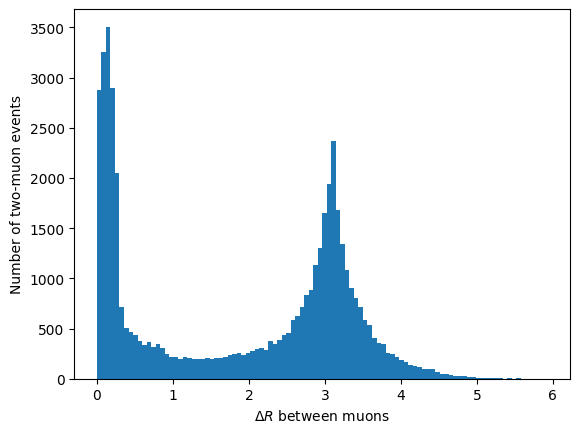

In [61]:
import matplotlib.pyplot as plt

plt.hist(dR, bins=100)
plt.xlabel(r'$\Delta R$ between muons')
plt.ylabel('Number of two-muon events')
plt.show()

## Recent developments

Vector [`v0.9.0`](https://github.com/scikit-hep/vector/releases/tag/v0.9.0) is out!
- Features: improved reprs, deltaRapidityPhi, backends are public now, …
- Documentation: major documentation overhaul, doctests, CITATION.cff, …
- Bug fixes: type checks, fix nan_to_num, …
- Maintenance: hatchling backend, support awkward._v2 in tests, build and test on Python 3.10 and 3.11-dev, …

More about `v0.9.0` here - https://vector.readthedocs.io/en/latest/changelog.html#version-0-9 

---

Vector [`v0.10.0`](https://github.com/scikit-hep/vector/releases/tag/v0.10.0) is out too!
- Removed support for Python 3.6

More about `v0.10.0` here - https://vector.readthedocs.io/en/latest/changelog.html#version-0-10 

## Near future development plans

- Better constructors (under work)
- A benchmarking suite
- Benchmarks against Root
- A complete `awkward` `v2` support (scheduled for December)
- NumPy-Numba backend
- Other potential backends - 

Vector was scheduled to have a major release (`v1.0.0`) before `PyHEP 2022`, but that was unfortunately delayed. A major release can be expected in October, which would primarily be introducing new constructors.

Open for user feedback and discussions!

## Stuck somewhere? Reach out!

- If something is not working the way it should, or if you want to request a new feature, create a [new issue](https://github.com/scikit-hep/vector/issues) on GitHub.
- To discuss something related to vector, use the [discussions](https://github.com/scikit-hep/vector/discussions/) tab on GitHub or vector’s gitter ([Scikit-HEP/vector](https://gitter.im/Scikit-HEP/vector)) chat room.
- Have a look at vector's [changelog](https://vector.readthedocs.io/en/latest/#changes-in-vector-s-api) to stay up-to-date!

## Cite vector

If you use `vector` in your work, please cite it using the following metadata -

```tex
@software{Schreiner_vector,
author = {Schreiner, Henry and Pivarski, Jim and Chopra, Saransh},
doi = {10.5281/zenodo.5942082},
license = {BSD-3-Clause},
title = {{vector}},
url = {https://github.com/scikit-hep/vector}
}
```